## Name : Fawzi Abdelnaby Elsayed
## Group : One(Mansoura)
## Predict the Precip Type using diffrenet Classification Algorithms

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.info()
print("Shape of Dataset : ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
Shape of Dataset :  (96453, 12)


## There are missing values in (Precip Type) column

In [4]:
df.isna().sum() 

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [6]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

# Preprocessing

## Precip Type is missing about 517 values , we will fill the missing values with the most occuring value

In [7]:
#checking what´s the most often item
df["Precip Type"].mode()[0] 

'rain'

In [8]:
#replacing null values by most often item, in this case it´s "rain"
df["Precip Type"] = df["Precip Type"].fillna(df["Precip Type"].mode()[0]) 
#test
df.isna().sum() 

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

### checking unique values in columns

In [9]:
{column: len(df[column].unique()) for column in df.columns} 

{'Formatted Date': 96429,
 'Summary': 27,
 'Precip Type': 2,
 'Temperature (C)': 7574,
 'Apparent Temperature (C)': 8984,
 'Humidity': 90,
 'Wind Speed (km/h)': 2484,
 'Wind Bearing (degrees)': 360,
 'Visibility (km)': 949,
 'Loud Cover': 1,
 'Pressure (millibars)': 4979,
 'Daily Summary': 214}

In [10]:
#"loud cover" has only one unique value
df = df.drop(["Loud Cover","Daily Summary"], axis=1) 
# test 
df.head()
print("Shape of Dataset : ", df.shape)

Shape of Dataset :  (96453, 10)


## apparent temperature is highly correlated to temperature and should be removed

In [11]:
df = df.drop(["Apparent Temperature (C)"], axis=1) 
# test
print("Shape of Dataset : ", df.shape)

Shape of Dataset :  (96453, 9)


## formating column to date format

In [12]:
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], format = "%Y-%m-%d %H:%M:%S.%f %z") 

## Splite (Formatted Date)column to three columns (Year , month , day)

In [13]:
df["year"] = df["Formatted Date"].apply(lambda x: x.year)
df["month"] = df["Formatted Date"].apply(lambda x: x.month)
df["day"] = df["Formatted Date"].apply(lambda x: x.day)

In [14]:
df = df.drop(["Formatted Date"], axis=1)

In [15]:
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,2006,4,1
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,2006,4,1
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1


# Cheack Categorical Columns

In [16]:
cols = df.columns
cols

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'year', 'month', 'day'],
      dtype='object')

In [17]:
num_cols = df._get_numeric_data().columns
num_cols

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'year', 'month', 'day'],
      dtype='object')

In [18]:
list(set(cols) - set(num_cols))

['Summary', 'Precip Type']

# Label encoding text values

In [19]:
le = preprocessing.LabelEncoder()

In [20]:
le.fit(df["Summary"])
list(le.classes_)

['Breezy',
 'Breezy and Dry',
 'Breezy and Foggy',
 'Breezy and Mostly Cloudy',
 'Breezy and Overcast',
 'Breezy and Partly Cloudy',
 'Clear',
 'Dangerously Windy and Partly Cloudy',
 'Drizzle',
 'Dry',
 'Dry and Mostly Cloudy',
 'Dry and Partly Cloudy',
 'Foggy',
 'Humid and Mostly Cloudy',
 'Humid and Overcast',
 'Humid and Partly Cloudy',
 'Light Rain',
 'Mostly Cloudy',
 'Overcast',
 'Partly Cloudy',
 'Rain',
 'Windy',
 'Windy and Dry',
 'Windy and Foggy',
 'Windy and Mostly Cloudy',
 'Windy and Overcast',
 'Windy and Partly Cloudy']

In [21]:
# Transform Summary

In [22]:
df["Summary"] = le.transform(df["Summary"])

In [23]:
le.fit(df["Precip Type"])
list(le.classes_)

['rain', 'snow']

In [24]:
# Transform Precip type
df["Precip Type"] = le.transform(df["Precip Type"])

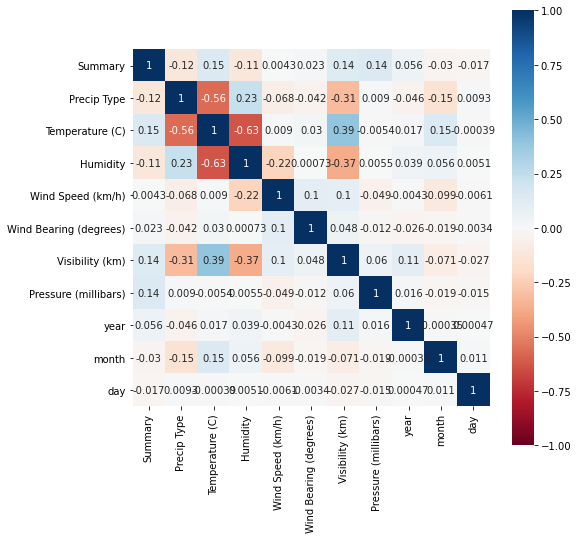

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='RdBu',
            annot=True, 
            square=True);

# Splitting Data

In [26]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'year', 'month', 'day'],
      dtype='object')

In [27]:
X = df.drop(["Precip Type"], axis = 1)
y = df["Precip Type"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.9f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.9f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.988954782
Accuracy of Logistic regression classifier on test set: 0.990461972


In [30]:
y_predict = logreg.predict(X_test)
print("The accuracy of the classifier on the validation set is" , accuracy_score(y_test,y_predict))

The accuracy of the classifier on the validation set is 0.99046197229825


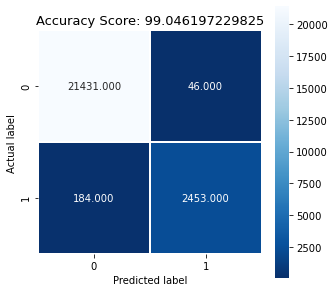

In [31]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logreg.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 13);

In [32]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_predict,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.93      0.96      2637
           0       0.99      1.00      0.99     21477

    accuracy                           0.99     24114
   macro avg       0.99      0.96      0.97     24114
weighted avg       0.99      0.99      0.99     24114



In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))

Accuracy: 0.99046197229825
Precision: 0.9815926370548219
Recall: 0.9302237390974593


# ROC Curve

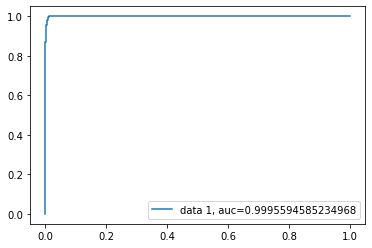

In [34]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
#### So our predictions are almost 99% accurate, i.e. we have identified 99% of the Precip Type correctly

### Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions .

### In the output, 21431(True - Positive) and 46(False - Negtive) are actual predictions, and 184(False- Positive )and 2453 (True - negative) are incorrect predictions.

### Accurecy in this model is 99% that is a good model

###  The Recall which the ability of a model to find all the relevant cases within a Precip Type in data set is 93% that is a good ratio

### The Precision which the ability of a classification model to identify only the relevant data points(Precip Type) is 98% that is a good ratio


### Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
### AUC(Area Under Curve) score for the case is 0.999


#######################################################################################################################

# DecisionTreeClassifier 

In [35]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.9f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.9f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.000000000
Accuracy of Decision Tree classifier on test set: 1.000000000


In [36]:
y_predict = clf.predict(X_test)
print("The accuracy of the classifier on the validation set is" , accuracy_score(y_test,y_predict))

The accuracy of the classifier on the validation set is 1.0


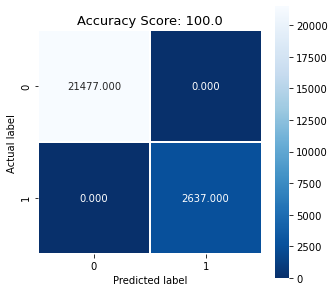

In [37]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 13);

In [38]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_predict,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2637
           0       1.00      1.00      1.00     21477

    accuracy                           1.00     24114
   macro avg       1.00      1.00      1.00     24114
weighted avg       1.00      1.00      1.00     24114



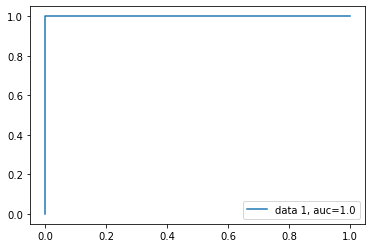

In [39]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## In (DecisionTreeClassifier and RandomForestClassifier) the accurecy is 100% because the correlation is very high

#########################################################################################################################

# RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 400, criterion = 'entropy')
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

1.0

### A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
#### (criterion = 'entropy') The function to measure the quality of a split

In [41]:
y_predict = rf.predict(X_test)
print("The accuracy of the classifier on the validation set is" , accuracy_score(y_test,y_predict))

The accuracy of the classifier on the validation set is 1.0


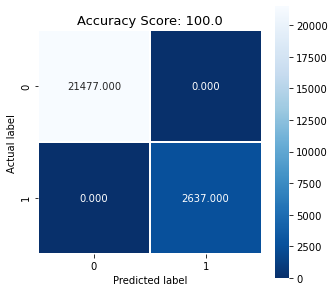

In [42]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 13);

In [43]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_predict,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2637
           0       1.00      1.00      1.00     21477

    accuracy                           1.00     24114
   macro avg       1.00      1.00      1.00     24114
weighted avg       1.00      1.00      1.00     24114



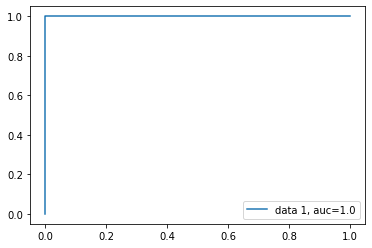

In [44]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##########################################################################################################################

# KNeighborsClassifier

#### Classifier implementing the k-nearest neighbors vote.
#### in this case when increase the n_neighbors the accuracy is decreased 
#### By defalut the Weight function is "uniform" that is All points in each neighborhood are weighted equally . 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
y_predict = classifier.predict(X_test)
print("The accuracy of the classifier on the validation set is" , accuracy_score(y_test,y_predict))

The accuracy of the classifier on the validation set is 0.9709297503524923


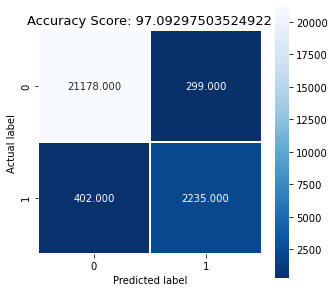

In [47]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(classifier.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 13);

In [48]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_predict,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.85      0.86      2637
           0       0.98      0.99      0.98     21477

    accuracy                           0.97     24114
   macro avg       0.93      0.92      0.92     24114
weighted avg       0.97      0.97      0.97     24114



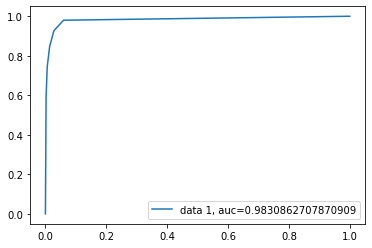

In [49]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

###########################################################################################################################

# Differenet SVC Models

## LinearSVC


### Linear Support Vector Classification is Similar to SVC with parameter kernel=’linear’
### Regularization parameter. The strength of the regularization is inversely proportional to C.
### C is a parameter of the SVC learner and is the penalty for misclassifying a data point. When C is small, the classifier is okay with misclassified data points (high bias, low variance). When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance).

In [50]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=0.1, max_iter=10000)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.9f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.9f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.989369496
Accuracy of SVM classifier on test set: 0.990130215


In [51]:
y_predict = svm.predict(X_test)
print("The accuracy of the classifier on the validation set is" , accuracy_score(y_test,y_predict))

The accuracy of the classifier on the validation set is 0.9901302148129717


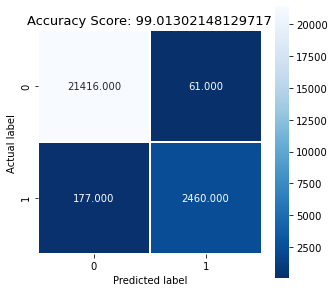

In [52]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(svm.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 13);

In [53]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_predict,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.93      0.95      2637
           0       0.99      1.00      0.99     21477

    accuracy                           0.99     24114
   macro avg       0.98      0.97      0.97     24114
weighted avg       0.99      0.99      0.99     24114



##########################################################################################################################

## SVC with kernal ='linear'

In [54]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=0.1 ,max_iter=10000)
svm=svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.9f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.9f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.983439085
Accuracy of SVM classifier on test set: 0.984739156


In [55]:
y_predict = svm.predict(X_test)
print("The accuracy of the classifier on the validation set is" , accuracy_score(y_test,y_predict))

The accuracy of the classifier on the validation set is 0.9847391556771999


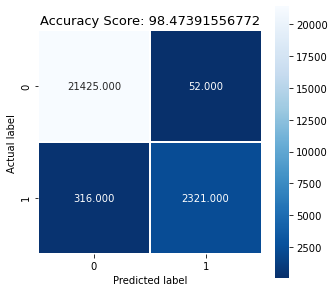

In [56]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(svm.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 13);

In [57]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_predict,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.88      0.93      2637
           0       0.99      1.00      0.99     21477

    accuracy                           0.98     24114
   macro avg       0.98      0.94      0.96     24114
weighted avg       0.98      0.98      0.98     24114



#########################################################################################################################

## SVC with kernel = rbf 


### Using (RBF) Radial Basis Function is a commonly used kernel in SVC
### Gamma: thought of as the ‘spread’ of the kernel and therefore the decision region. When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad. When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points
### C I illustrate this parameter above


In [58]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', gamma=0.7, C=1.0)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.9f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.9f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.991387771
Accuracy of SVM classifier on test set: 0.991954881


In [59]:
y_predict = svm.predict(X_test)
print("The accuracy of the classifier on the validation set is" , accuracy_score(y_test,y_predict))

The accuracy of the classifier on the validation set is 0.9919548809820021


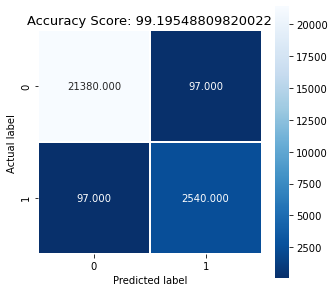

In [60]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(svm.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 13);

In [61]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_predict,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.96      0.96      2637
           0       1.00      1.00      1.00     21477

    accuracy                           0.99     24114
   macro avg       0.98      0.98      0.98     24114
weighted avg       0.99      0.99      0.99     24114



###########################################################################################################################

## SVC with kernel = poly


### degree : It represents the degree of the ‘poly’ kernel function and will be ignored by all other kernels.

In [62]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', degree=2, gamma='auto', C=1.0)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.9f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.9f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.979485478
Accuracy of SVM classifier on test set: 0.980965414


In [63]:
y_predict = svm.predict(X_test)
print("The accuracy of the classifier on the validation set is" , accuracy_score(y_test,y_predict))

The accuracy of the classifier on the validation set is 0.9809654142821598


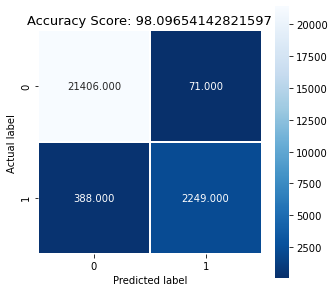

In [64]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(svm.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 13);

In [65]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_predict,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.85      0.91      2637
           0       0.98      1.00      0.99     21477

    accuracy                           0.98     24114
   macro avg       0.98      0.92      0.95     24114
weighted avg       0.98      0.98      0.98     24114

